In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  # Arrange GPU devices starting from 0
os.environ["CUDA_VISIBLE_DEVICES"]= "3"  # Set the GPU 3 to use

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("./train.csv")
data.head()

,Unnamed: 0,Label,times,F0(pitch),F1,F2,F3,F4,F5
0,0,BYJ,0.037993,NaN,934.456137,1867.766912,2958.658056,4026.961381,NaN
1,1,BYJ,0.137993,NaN,1338.936874,2694.203872,2875.547156,4229.574451,NaN
2,2,BYJ,0.237993,NaN,1160.135803,2144.572867,3476.990084,4433.055683,NaN
3,3,BYJ,0.337993,NaN,211.203260,1472.209366,2708.645128,3839.022388,NaN
4,4,BYJ,0.437993,NaN,381.149933,1721.053643,2682.587186,3957.900682,NaN


In [4]:
print("라벨:", data["Label"].unique(), sep="\n")

라벨:
['BYJ' 'HYN' 'SJW']


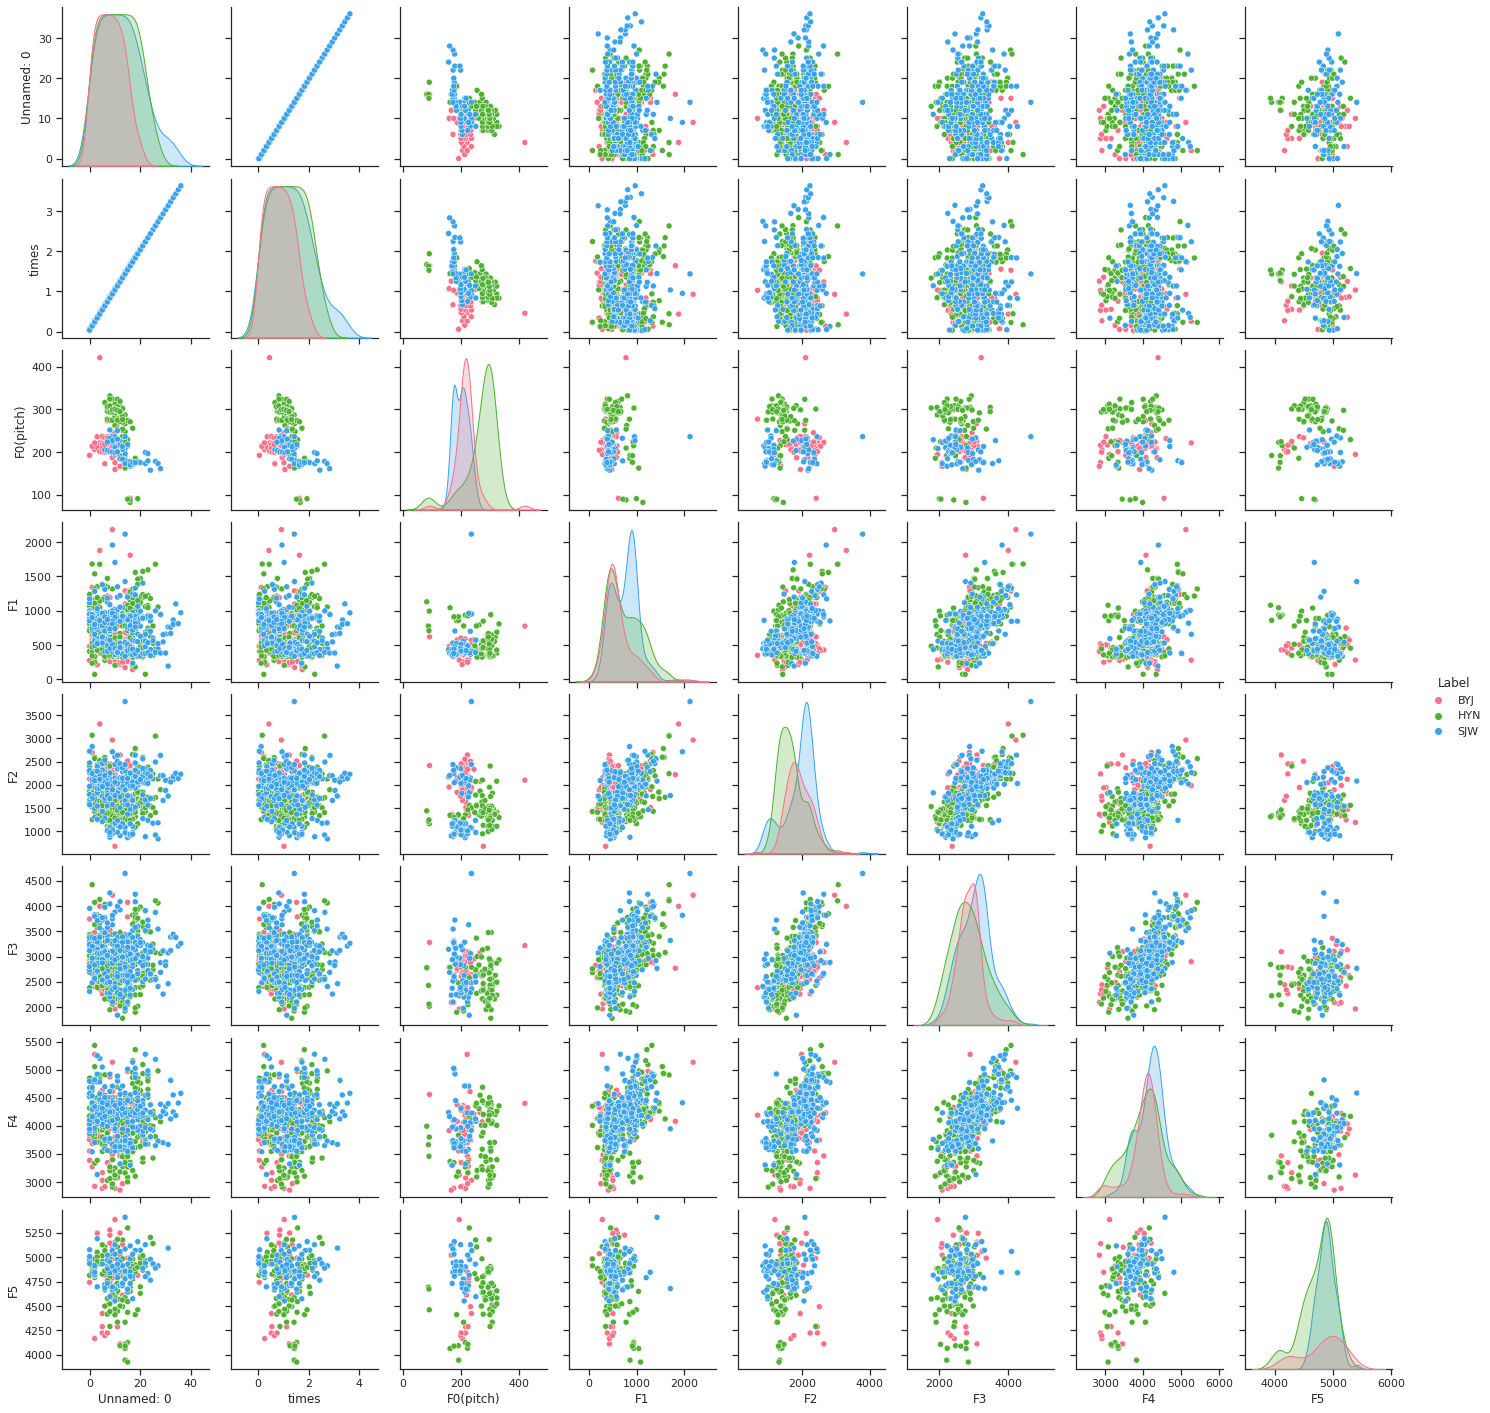

In [5]:
#3명이 7개의 피쳐에 대해 어떤 분포를 가지고 있는지 시각화
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Label", palette="husl")

In [6]:
import tensorflow as tf
import datetime
from sklearn.utils import shuffle

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
train_data = data.fillna(value=0)
user_id_arr = train_data['Label'].unique()
user_count = user_id_arr.shape[0]
train_data = pd.get_dummies(train_data)
train_data = train_data.astype('float64')
train_data = shuffle(train_data)
X_len=len(train_data.columns)-user_count
y_len=user_count
X=train_data.iloc[:,0:X_len]
y=train_data.iloc[:,-user_count:]

In [8]:
X.head()

,Unnamed: 0,times,F0(pitch),F1,F2,F3,F4,F5
67,10.0,1.028673,175.253114,455.397124,1339.731127,2087.568228,2886.929910,5137.811835
527,5.0,0.526667,0.000000,595.514011,1752.039896,2942.932201,4374.986814,0.000000
133,0.0,0.036009,0.000000,919.806791,2125.684001,2899.882080,4143.087193,0.000000
419,10.0,1.046000,0.000000,987.403746,2606.368271,2626.846621,4148.737943,0.000000
581,14.0,1.452667,0.000000,535.992566,1577.943144,2790.159626,3795.556799,4778.943928


In [9]:
y.head()

,Label_BYJ,Label_HYN,Label_SJW
67,1.0,0.0,0.0
527,0.0,0.0,1.0
133,1.0,0.0,0.0
419,0.0,0.0,1.0
581,0.0,0.0,1.0


In [10]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [70],
           'max_depth' : [10],
           'min_samples_leaf' : [1],
          'min_samples_split' : [2], 
          'class_weight': ['balanced', None], 
          'random_state':[None, 0],
          'min_impurity_decrease':[0.0],
          'min_weight_fraction_leaf':[0.0]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X, y)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
'''

"\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nparams = { 'n_estimators' : [70],\n           'max_depth' : [10],\n           'min_samples_leaf' : [1],\n          'min_samples_split' : [2], \n          'class_weight': ['balanced', None], \n          'random_state':[None, 0],\n          'min_impurity_decrease':[0.0],\n          'min_weight_fraction_leaf':[0.0]\n            }\n\n# RandomForestClassifier 객체 생성 후 GridSearchCV 수행\nrf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)\ngrid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)\ngrid_cv.fit(X, y)\n\nprint('최적 하이퍼 파라미터: ', grid_cv.best_params_)\nprint('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))\n"

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators = 70, 
                            max_depth = 10,
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            random_state = 0,
                            class_weight='balanced',
                            min_impurity_decrease=0.0,
                           min_weight_fraction_leaf=0.0
                          )

In [12]:
X_data=np.array(X)
Y_data=np.array(y)

In [13]:
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_data,Y_data, test_size=0.2, random_state=777, stratify=Y_data)

In [15]:
Y_train_val = np.argmax(Y_train_val, axis=1)
Y_test = np.argmax(Y_test, axis=1)

In [16]:
skf = StratifiedKFold(n_splits=5)
k=5

In [17]:
result_Y_val=[]
result_Y_val_pred=[]
model =  rf

i=0
for train_index,val_index in skf.split(X_train_val,Y_train_val):
    i=i+1
    print(str(i),"번째 cross validation")
    X_train = X_train_val[train_index]
    Y_train = Y_train_val[train_index]  
    X_val = X_train_val[val_index]
    Y_val = Y_train_val[val_index]
    
    model.fit(X_train, Y_train)

    Y_val_pred = rf.predict(X_val)
    result_Y_val.append(Y_val)
    result_Y_val_pred.append(Y_val_pred)



1 번째 cross validation
2 번째 cross validation
3 번째 cross validation
4 번째 cross validation
5 번째 cross validation


In [18]:
Y_pred=model.predict(X_test)

In [19]:
def evaluation(Y_test,y_pred):
    acc= accuracy_score(Y_test,y_pred)
    print("accuracy : {}".format(acc))
    prec= precision_score(Y_test,y_pred, average='micro')
    print("precision : {}".format(prec))
    rec= recall_score(Y_test,y_pred, average='micro')
    print("recall: {}".format(rec))
    f1= f1_score(Y_test,y_pred, average='micro')
    print("F1-Score : {}".format(f1))

In [20]:
for i in range(k):
    print("{} 번째 cross validation".format(i+1))
    evaluation(result_Y_val[i],result_Y_val_pred[i])
    print("\n")

1 번째 cross validation
accuracy : 0.7904761904761904
precision : 0.7904761904761904
recall: 0.7904761904761904
F1-Score : 0.7904761904761904


2 번째 cross validation
accuracy : 0.7238095238095238
precision : 0.7238095238095238
recall: 0.7238095238095238
F1-Score : 0.7238095238095238


3 번째 cross validation
accuracy : 0.7142857142857143
precision : 0.7142857142857143
recall: 0.7142857142857143
F1-Score : 0.7142857142857143


4 번째 cross validation
accuracy : 0.7333333333333333
precision : 0.7333333333333333
recall: 0.7333333333333333
F1-Score : 0.7333333333333333


5 번째 cross validation
accuracy : 0.75
precision : 0.75
recall: 0.75
F1-Score : 0.75




In [21]:
evaluation(Y_test,Y_pred)

accuracy : 0.696969696969697
precision : 0.696969696969697
recall: 0.696969696969697
F1-Score : 0.696969696969697


In [22]:
Y_test

array([1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0, 1,
       1, 2, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 2,
       2, 0, 2, 0, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 2, 2, 1, 2])

In [23]:
Y_pred

array([1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 1, 2, 2,
       0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 2, 1,
       0, 2, 2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 1,
       0, 2, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2])